In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-play-store-games/android-games.csv


**1. Import the Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**2. Look for the basic information about the dataset**

In [3]:
data = pd.read_csv("../input/top-play-store-games/android-games.csv")
data.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


**3. Knowing about the columns in the dataset**

In [4]:
pd.DataFrame({"Columns": data.columns})

,Columns
0,rank
1,title
2,total ratings
3,installs
4,average rating
5,growth (30 days)
6,growth (60 days)
7,price
8,category
9,5 star ratings


In [5]:
print("Data shape: ", data.shape)

Data shape:  (1730, 15)


**4. Dataset Info**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [7]:
data.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


**5. Checking of the dataset, whether it is clean or not**

In [8]:
data.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [9]:
data['installs'].value_counts()

10.0 M      805
50.0 M      252
5.0 M       245
100.0 M     204
1.0 M       192
500.0 k      15
500.0 M      12
100.0 k       3
1000.0 M      2
Name: installs, dtype: int64

**6. Checking whether there is any relationship between paid and price**

In [10]:
data['price'].value_counts()

0.00    1723
1.99       3
1.49       1
0.99       1
2.99       1
7.49       1
Name: price, dtype: int64

In [11]:
data['paid'].value_counts()

False    1723
True        7
Name: paid, dtype: int64

**7. Dropping prices as most of the games are free**

In [12]:
data.drop('price', axis=1, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   category          1730 non-null   object 
 8   5 star ratings    1730 non-null   int64  
 9   4 star ratings    1730 non-null   int64  
 10  3 star ratings    1730 non-null   int64  
 11  2 star ratings    1730 non-null   int64  
 12  1 star ratings    1730 non-null   int64  
 13  paid              1730 non-null   bool   
dtypes: bool(1), float64(2), int64(8), object(3)
memory usage: 177.5+ KB


**8. Game Categories**

In [14]:
data['category'].value_counts(normalize=True)

GAME CARD            0.072832
GAME WORD            0.060116
GAME RACING          0.057803
GAME CASINO          0.057803
GAME SPORTS          0.057803
GAME BOARD           0.057803
GAME ROLE PLAYING    0.057803
GAME PUZZLE          0.057803
GAME SIMULATION      0.057803
GAME ARCADE          0.057803
GAME ADVENTURE       0.057803
GAME TRIVIA          0.057803
GAME CASUAL          0.057803
GAME EDUCATIONAL     0.057803
GAME ACTION          0.057803
GAME MUSIC           0.057803
GAME STRATEGY        0.057803
Name: category, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Games by category')

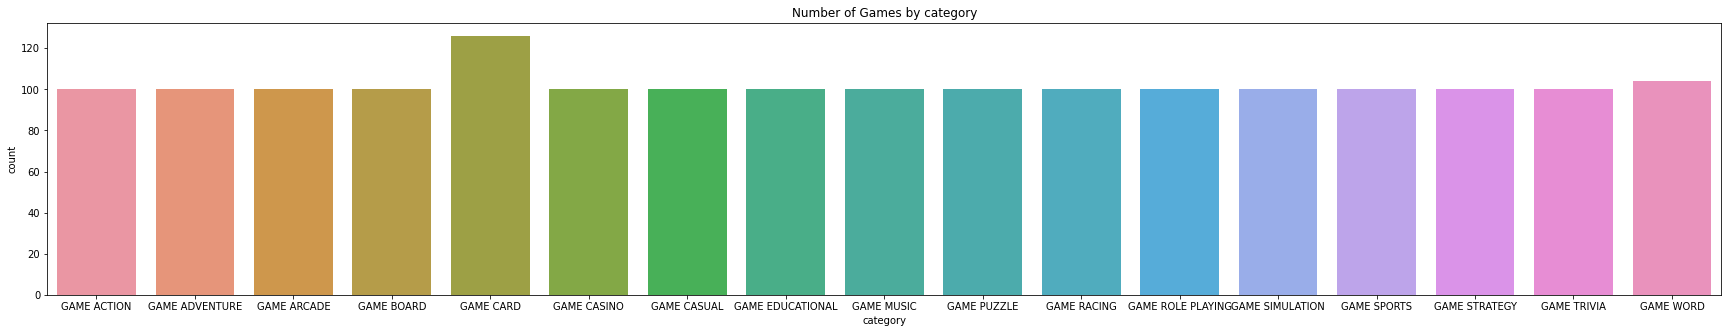

In [15]:
plt.figure(figsize = (30, 5))
sns.countplot(data.category)
plt.title("Number of Games by category")

**9. Total Ratings**

In [16]:
data['total ratings'].describe()

count    1.730000e+03
mean     1.064332e+06
std      3.429250e+06
min      3.299300e+04
25%      1.759992e+05
50%      4.286065e+05
75%      8.837970e+05
max      8.627313e+07
Name: total ratings, dtype: float64

In [17]:
data = data.rename(columns={'total ratings':'Total_ratings'})

Text(0.5, 1.0, 'Total Ratings of the Games')

<Figure size 1440x144 with 0 Axes>

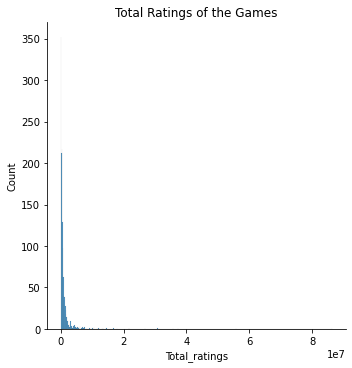

In [18]:
plt.figure(figsize = (20, 2))
sns.displot(data.Total_ratings)
plt.title("Total Ratings of the Games")

**10. Making installs into numerical values**

In [19]:
def in_thousand (inst):
    if inst == '500.0 k':
        return '0.5 M' 
    elif inst == '100.0 k':
        return '0.1 M'
    else:
        return inst
data['installs']= data['installs'].apply(in_thousand)

data['installs']= data['installs'].str.replace( 'M', '').str.strip().astype('float')

data= data.rename(columns={'installs': 'installs_in_million'})
data['installs_in_million'].value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs_in_million, dtype: int64

In [20]:
data['installs_in_million'].describe

<bound method NDFrame.describe of 0       500.0
1       500.0
2       100.0
3       100.0
4       500.0
        ...  
1725      1.0
1726      1.0
1727     10.0
1728      5.0
1729     10.0
Name: installs_in_million, Length: 1730, dtype: float64>

Text(0.5, 1.0, 'Number of Game Install in Millions')

<Figure size 720x360 with 0 Axes>

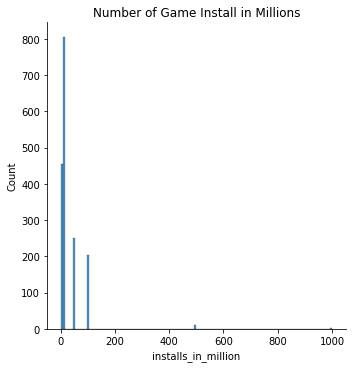

In [21]:
plt.figure(figsize = (10, 5))
sns.displot(data.installs_in_million)
plt.title("Number of Game Install in Millions")

**11. Paid and free games**

In [22]:
data['paid'].value_counts(normalize=True)

False    0.995954
True     0.004046
Name: paid, dtype: float64

In [23]:
paid_free= data['paid'].value_counts()
label =['Free','Paid']
fig = px.pie(paid_free, values=data['paid'].value_counts().values, names=label,
             title='Paid & Free Games')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**12.Total Ratings by Category**

In [24]:
total_ratings_by_category = data.groupby('category')['Total_ratings'].mean()
total_ratings_by_category

category
GAME ACTION          4.011344e+06
GAME ADVENTURE       8.935617e+05
GAME ARCADE          1.793780e+06
GAME BOARD           4.457431e+05
GAME CARD            3.326041e+05
GAME CASINO          3.619031e+05
GAME CASUAL          2.470866e+06
GAME EDUCATIONAL     1.529804e+05
GAME MUSIC           2.163020e+05
GAME PUZZLE          9.466929e+05
GAME RACING          1.139027e+06
GAME ROLE PLAYING    7.087648e+05
GAME SIMULATION      9.341417e+05
GAME SPORTS          1.353829e+06
GAME STRATEGY        1.856570e+06
GAME TRIVIA          2.982217e+05
GAME WORD            3.943603e+05
Name: Total_ratings, dtype: float64

In [25]:
fig = px.bar(total_ratings_by_category, x= total_ratings_by_category.index, y=total_ratings_by_category.values, labels={'y':'Total_Ratings'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

**13.Number of Game Installations by Game Category**

In [26]:
install_by_category = data.groupby('category')['installs_in_million'].mean()
install_by_category

category
GAME ACTION          74.100000
GAME ADVENTURE       18.030000
GAME ARCADE          71.610000
GAME BOARD           21.230000
GAME CARD            12.484127
GAME CASINO           7.715000
GAME CASUAL          63.970000
GAME EDUCATIONAL     17.895000
GAME MUSIC           12.487000
GAME PUZZLE          36.210000
GAME RACING          46.750000
GAME ROLE PLAYING    14.080000
GAME SIMULATION      27.710000
GAME SPORTS          33.610000
GAME STRATEGY        23.910000
GAME TRIVIA           6.901000
GAME WORD            12.317308
Name: installs_in_million, dtype: float64

In [27]:
fig = px.bar(install_by_category, x= install_by_category.index, y=install_by_category.values, labels={'y':'Install in Millions'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [28]:
growth_by_category_30 = data.groupby('category')['growth (30 days)'].mean()
growth_by_category_30

category
GAME ACTION            18.808000
GAME ADVENTURE        259.101000
GAME ARCADE            58.924000
GAME BOARD             34.445000
GAME CARD             746.598413
GAME CASINO          2335.253000
GAME CASUAL            36.020000
GAME EDUCATIONAL      102.455000
GAME MUSIC             24.626000
GAME PUZZLE            44.362000
GAME RACING           207.103000
GAME ROLE PLAYING     209.979000
GAME SIMULATION        13.406000
GAME SPORTS           159.543000
GAME STRATEGY          18.281000
GAME TRIVIA          1079.680000
GAME WORD              22.433654
Name: growth (30 days), dtype: float64

In [29]:
fig = px.bar(growth_by_category_30, x= growth_by_category_30.index, y=growth_by_category_30, labels={'y':'Growth in 30 days'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [30]:
growth_by_category_60 = data.groupby('category')['growth (60 days)'].mean()
growth_by_category_60

category
GAME ACTION          118.294000
GAME ADVENTURE         6.084000
GAME ARCADE           21.970000
GAME BOARD           587.891000
GAME CARD            555.337302
GAME CASINO            2.193000
GAME CASUAL           14.812000
GAME EDUCATIONAL      14.748000
GAME MUSIC            22.160000
GAME PUZZLE           12.062000
GAME RACING           88.963000
GAME ROLE PLAYING      3.037000
GAME SIMULATION       20.196000
GAME SPORTS            8.492000
GAME STRATEGY        435.440000
GAME TRIVIA            6.180000
GAME WORD             55.725000
Name: growth (60 days), dtype: float64

In [31]:
fig = px.bar(growth_by_category_60, x= growth_by_category_60.index, y=growth_by_category_60, labels={'y':'Growth in 60 days'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

**14.Top 3 Ranked Games by Category**

In [32]:
top_ranked_games = data[data['rank']<4][['rank','title','category', 'Total_ratings', 'installs_in_million', '5 star ratings']]
top_ranked_games

,rank,title,category,Total_ratings,installs_in_million,5 star ratings
0,1,Garena Free Fire- World Series,GAME ACTION,86273129,500.0,63546766
1,2,PUBG MOBILE - Traverse,GAME ACTION,37276732,500.0,28339753
2,3,Mobile Legends: Bang Bang,GAME ACTION,26663595,100.0,18777988
100,1,Roblox,GAME ADVENTURE,21820451,100.0,16674013
101,2,Pokémon GO,GAME ADVENTURE,14541662,100.0,9517488
102,3,Criminal Case,GAME ADVENTURE,4273420,100.0,3264905
200,1,Subway Surfers,GAME ARCADE,35665901,1000.0,27138572
201,2,Hungry Shark Evolution - Offline survival game,GAME ARCADE,7202013,100.0,5220860
202,3,Geometry Dash Lite,GAME ARCADE,6960814,100.0,4787054
300,1,Ludo King™,GAME BOARD,7512316,500.0,5291589


**15.Top 3 Games by Category and Their Total Ratings**

In [33]:
fig = px.scatter(top_ranked_games, y= 'title', x='Total_ratings', 
                 hover_data = top_ranked_games[['category','rank']], color='category', 
                 title = "Top 3 Games by Their Total Ratings")
fig.show()

In [34]:
top_20 = data.sort_values(by='installs_in_million', ascending=False).head(20)
top_20

,rank,title,Total_ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
200,1,Subway Surfers,35665901,1000.0,4,0.5,1.0,GAME ARCADE,27138572,3366600,1622695,814890,2723142,False
626,1,Candy Crush Saga,31367945,1000.0,4,0.9,1.6,GAME CASUAL,23837448,4176798,1534041,486005,1333650,False
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
207,8,Temple Run,4816448,500.0,4,0.7,1.5,GAME ARCADE,3184391,438320,318164,204384,671187,False
1426,1,Clash of Clans,55766763,500.0,4,0.3,1.0,GAME STRATEGY,43346128,5404966,2276203,971321,3768141,False
1026,1,Hill Climb Racing,10188038,500.0,4,0.4,0.8,GAME RACING,7148370,982941,607603,338715,1110407,False
1326,1,8 Ball Pool,21632735,500.0,4,1.2,630.8,GAME SPORTS,16281475,2268294,1017204,425693,1640067,False
630,5,Pou,11506051,500.0,4,0.2,0.5,GAME CASUAL,8175679,1051014,688712,346244,1244400,False
628,3,My Talking Angela,13050503,500.0,4,0.6,1.4,GAME CASUAL,9165205,1073761,636763,399662,1775110,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,False


In [35]:
fig = px.bar(top_20, x= 'title', y='installs_in_million', hover_data = top_20[['5 star ratings']], color='category')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()